In [2]:
# Let's start by importing the libraries we will need below.

from google.colab import drive
drive.mount('/content/drive')

import math
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/April')  # Here is the location of my stock historical database.
from pipelines import loaders, filters, interpolators  # Import my own data pipelines.

print("Imported Libraries")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Imported Libraries


In [27]:
# Let's choose from a number of stocks to get a good feel for our EDA.
# For argument's sake let's select two of the highest and two of the lowest performing stocks in 2021.
# However, depending on your strategy you might weight trades more to positive momentum, market cap, or trade volume.

tickers = ['AAPL', 'AMD', 'WYNN', 'ETSY']
yf_filepath = '/content/drive/MyDrive/Colab Notebooks/April/data/yf'
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']  # We will request OHLCV data from our database.
historicals = loaders.load_historicals(tickers, columns, yf_filepath)  # Loaded as a dict, with each key being a ticker string and with values as a pandas dataframe.
display(historicals['AAPL'].head())  # Let's see an example of our loaded historicals.

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-22,2.729483,2.730096,2.622619,2.657526,1.454026e+09
2007-01-23,2.625068,2.679571,2.618331,2.624149,1.207424e+09
2007-01-24,2.654158,2.668550,2.635786,2.654771,9.278136e+08
2007-01-25,2.667324,2.709886,2.634254,2.640991,9.059736e+08
2007-01-26,2.667324,2.675285,2.602409,2.614351,9.868740e+08


###1. Basic Returns


In [28]:
# Starting with the basic returns transformation as stated earlier in the readme.md file

def transform_by_daily_percent_returns(historicals):
  '''Transforms historical ohlcv to their daily change percents.

  Daily percent changes are calculated by with the equation (P2/P1)*100.
  Where P2 is the OHLCV data for the current day and P1 is the OHLCV data
  for the previous day, see "_calculate_daily_returns(ohlcv)."
  
  Args:
    historicals: dict with tickers as keys and values
                 as pandas dataframes.

  Returns:
    historicals_by_returns: dict with tickers as keys and values
                            as pandas dataframes.
  '''

  historicals_by_returns = {}
  for ticker, ohlcv in historicals.items():
    historicals_by_returns[ticker] = _calculate_daily_returns(ohlcv)
  return historicals_by_returns

def _calculate_daily_returns(ohlcv):
  '''Calculates daily prices for the given price history.
  
  The index wil be shifted

  Args:
    ohlcv: pandas dataframe

  Returns:
    daily_perc_changes: pandas dataframe
  '''

  daily_perc_changes = ((ohlcv.shift(-1) / ohlcv) - 1)  # (-1) to center the mean to 0
  shifted_index = daily_perc_changes.index[1:]  # Shift index for returns percentages to line up on the same day
  daily_perc_changes = daily_perc_changes.dropna()
  daily_perc_changes.index = shifted_index
  return daily_perc_changes

historicals_by_returns = transform_by_daily_percent_returns(historicals)
display(historicals_by_returns['AMD'].head())  # Let's take a look at below

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-23,0.000569,0.003401,0.006373,-0.001141,0.034550
2007-01-24,-0.077273,-0.070621,-0.082902,-0.084523,1.945157
2007-01-25,-0.006158,-0.002432,0.004394,0.001248,-0.585950
2007-01-26,0.000620,-0.008531,0.000625,0.010592,-0.072891
2007-01-29,0.003715,-0.002459,-0.009994,-0.016646,0.048535


count    3775.000000
mean        0.001305
std         0.020144
min        -0.179195
25%        -0.007771
50%         0.001112
75%         0.011569
max         0.139049
Name: Close, dtype: float64
Skewness is -0.177524596452713
Kurtosis is 6.313974857330322


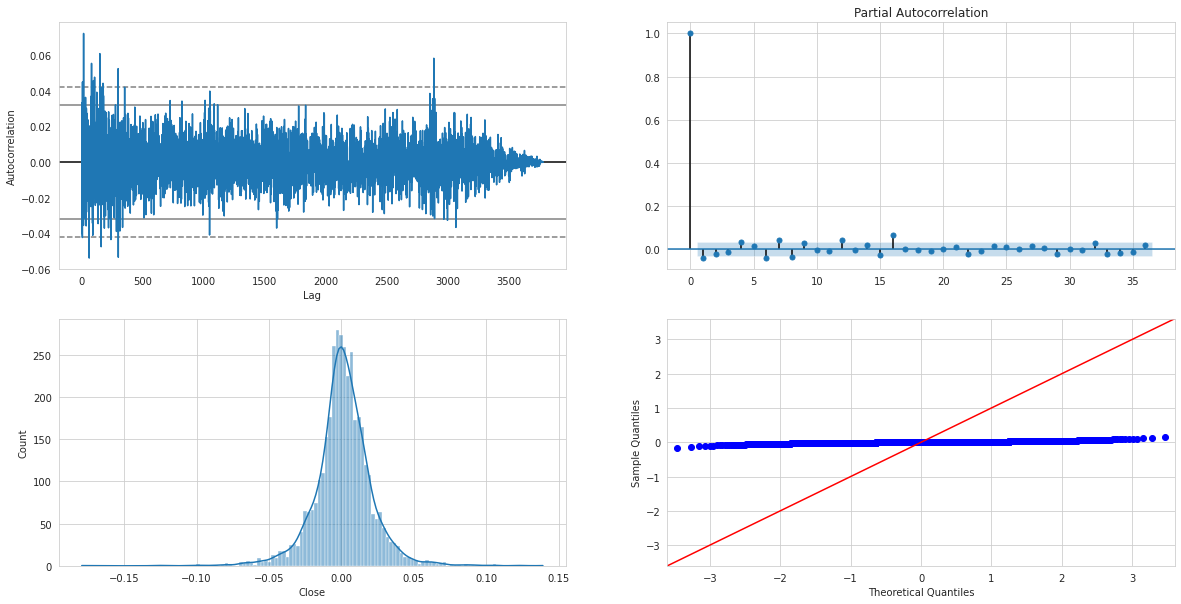

In [30]:
# Let's plot some typical statistical graphs
# ACF Plot
# PACF Plot
# Histogram Plot
# QQ Plot

def plot_stationary_graphs(ticker_diff):
  '''
  
  
  '''

  %matplotlib inline
  figure_dims = (20, 10)
  fig, ax = plt.subplots(2,2, figsize=figure_dims)
  sns.set_style('whitegrid')
  ax[0][0] = autocorrelation_plot(ticker_diff, ax=ax[0][0])
  ax[0][1] = plot_pacf(ticker_diff, ax=ax[0][1])
  ax[1][0] = sns.histplot(data=ticker_diff, kde=True, ax=ax[1][0])
  sm.qqplot(ticker_diff, line='45', ax=ax[1][1])
  print(ticker_diff.describe())
  print('Skewness is {}'.format(ticker_diff.skew()))
  print('Kurtosis is {}'.format(ticker_diff.kurtosis()))
  plt.show()

plot_stationary_graphs(historicals_by_returns['AAPL']['Close'])

In [ ]:
# As we can see above, there are two statsitical properties that differ greatly from a gaussian normal distribution
# and the basic return distribution above. This is the low standard deviation and high kurtosis. In theory,
# the term black swan events in trading can be seen here.


#the kurtosis is very high combined with a low standard devivation. In is in this case we can see
# black swan events. Because although the majority of returns center around 0 with a very low standard deviaation, the 
# distribution because streteched out because of it's high kurtosis.

###2. Log Returns

In [ ]:
# Two log transformations to check here, base e and base 10

def transform_by_daily_percent_returns(historicals):
  '''Transforms historical ohlcv to their daily change percents.

  Daily percent changes are calculated by with the equation (P2/P1)*100.
  Where P2 is the OHLCV data for the current day and P1 is the OHLCV data
  for the previous day, see "_calculate_daily_returns(ohlcv)."
  
  Args:
    historicals: dict with tickers as keys and values
                 as pandas dataframes.

  Returns:
    historicals_by_returns: dict with tickers as keys and values
                            as pandas dataframes.
  '''

  historicals_by_returns = {}
  for ticker, ohlcv in historicals.items():
    historicals_by_returns[ticker] = _calculate_daily_returns(ohlcv)
  return historicals_by_returns


def difference_by_log_returns(ticker_historical, base=10):
  '''A'''
  ticker_diff = (ticker_historical/ticker_historical.shift(1))
  if base == 10:
    ticker_diff = np.log10(ticker_diff)*100
  else:
    ticker_diff = np.log(ticker_diff)
  ticker_diff = ticker_diff.dropna()
  return ticker_diff

In [ ]:
print("Log Differences\n")
# At some point we will have to look into natural log base vs log10 base
ticker_log_diff = difference_by_log_returns(ticker_historical, base=10).drop(columns='Volume') 
plot_stationary_graphs(ticker_log_diff['Close'])

### Normalization